In [1]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [2]:
df = pd.DataFrame()

In [3]:
df['X1'] =      [1, 2, 3, 4, 5, 6, 6, 7, 9, 9]
df['X2'] =      [5, 3, 6, 8, 1, 9, 5, 8, 9, 2]
df['label'] =   [1, 1, 0, 1, 0, 1, 0, 1, 0, 0]

In [4]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<AxesSubplot:xlabel='X1', ylabel='X2'>

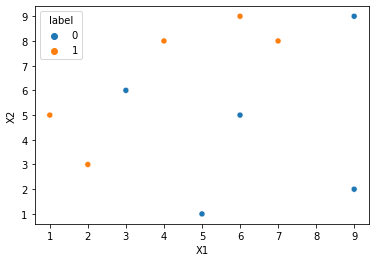

In [5]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [11]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [14]:
# Step 2 - Train 1st model
dt1.fit(X, y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'X[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]')]

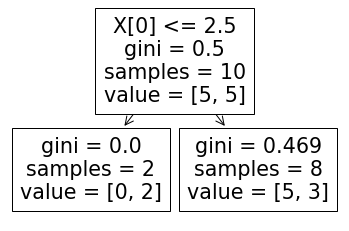

In [16]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<AxesSubplot:>

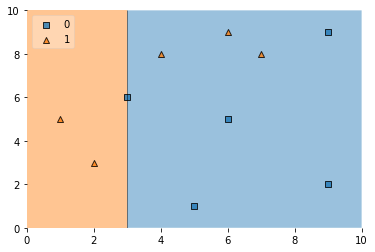

In [17]:
plot_decision_regions(X, y, clf=dt1, legend=2)

In [18]:
df['y_pred'] = dt1.predict(X)

In [19]:
df

,X1,X2,label,y_pred
0,1,5,1,1
1,2,3,1,1
2,3,6,0,0
3,4,8,1,0
4,5,1,0,0
5,6,9,1,0
6,6,5,0,0
7,7,8,1,0
8,9,9,0,0
9,9,2,0,0


In [20]:
def calculate_model_weight(error):
    return 0.5*np.log((1-error)/error)

In [21]:
alpha1 = calculate_model_weight(0.3)
alpha1

0.42364893019360184

In [22]:
# Step 4 upate weight
def update_row_weights(row, alpha=0.423):
    if row['label']==row['y_pred']:
        return row['weights']*np.exp(-alpha)
    else:
        return row['weights']*np.exp(alpha)

In [23]:
df['update_weights'] = df.apply(update_row_weights, axis=1)

KeyError: 'weights'

In [24]:
df

,X1,X2,label,y_pred
0,1,5,1,1
1,2,3,1,1
2,3,6,0,0
3,4,8,1,0
4,5,1,0,0
5,6,9,1,0
6,6,5,0,0
7,7,8,1,0
8,9,9,0,0
9,9,2,0,0


In [25]:
df['updated_weights'].sum()

KeyError: 'updated_weights'

In [26]:
df['nomalized_weights'] = df['updated_weights']/df['updated_weights'].sum()

KeyError: 'updated_weights'